In [2]:
import pandas as pd
import geopandas as gpd

# Load the dataset
df = pd.read_csv('data/pedestrian-network.csv')

# Convert the Geo Shape column to geometries (assuming it's in WKT format)
gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df['Geo Shape']))

# Calculate the length of each link
gdf['length'] = gdf.geometry.length

# Display the lengths
print(gdf[['Geo Shape', 'length']])

GEOSException: ParseException: Unknown type: '{"COORDINATES":'

In [6]:
import json
from shapely.geometry import shape
import geopandas as gpd

# Assuming df is your DataFrame that contains a column 'Geo Shape'
# Initialize a list to hold the geometries
geometries = []

# Convert each Geo Shape to a shapely geometry
for geo_shape in df['Geo Shape']:
    geom = shape(json.loads(geo_shape))  # Load the JSON-like string to a dictionary
    geometries.append(geom)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometries)

# Now you can use gdf for further analysis
print(gdf)

                                 Geo Point  \
0          -37.8057527567, 144.94358257745   
1          -37.8059379724, 144.95541437055   
2          -37.80601710605, 144.9583321779   
3      -37.805993000200004, 144.9581158197   
4       -37.8057292937, 144.94352885979998   
...                                    ...   
85321       -37.8336326444, 144.9863268138   
85322       -37.7950035101, 144.9184620511   
85323       -37.7968924371, 144.9573721933   
85324       -37.7967435061, 144.9226949664   
85325         -37.8119092124, 144.96165035   

                                               Geo Shape  OBJECTID  NeworkID  \
0      {"coordinates": [[144.9436093203, -37.80576444...     15737       NaN   
1      {"coordinates": [[144.9554364138, -37.80594353...     15739       NaN   
2      {"coordinates": [[144.958382231, -37.806021856...     15740       NaN   
3      {"coordinates": [[144.9581342537, -37.80599359...     15741       NaN   
4      {"coordinates": [[144.9435558346, -37.80

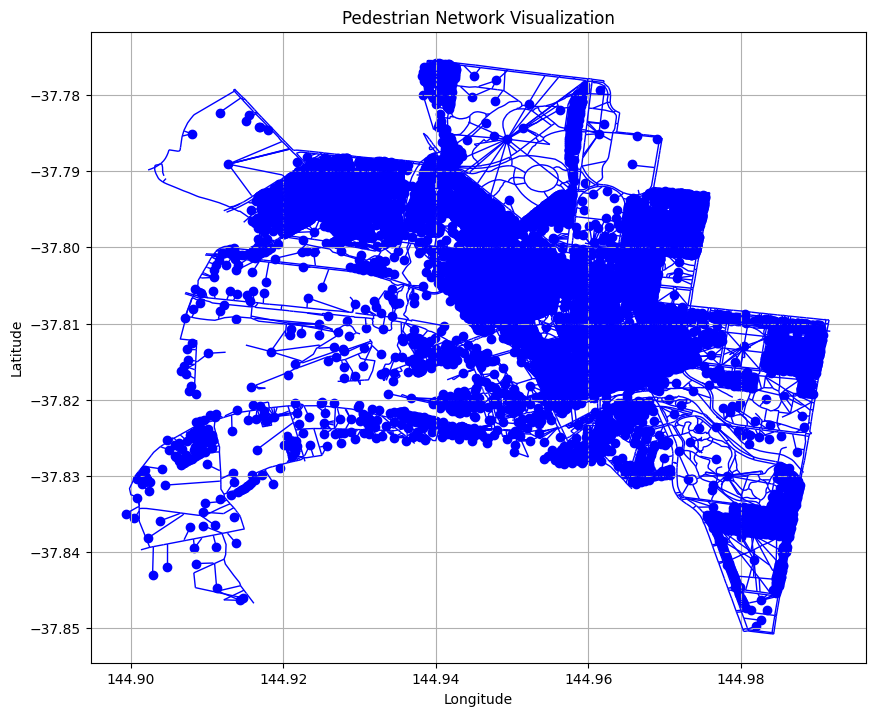

In [8]:
import matplotlib.pyplot as plt

# Create a plot of the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))  # Set the figure size
gdf.plot(ax=ax, color='blue', linewidth=1)  # Plot the geometries
plt.title('Pedestrian Network Visualization')  # Add a title
plt.xlabel('Longitude')  # X-axis label
plt.ylabel('Latitude')  # Y-axis label
plt.grid(True)  # Show grid
plt.show()  # Display the plot

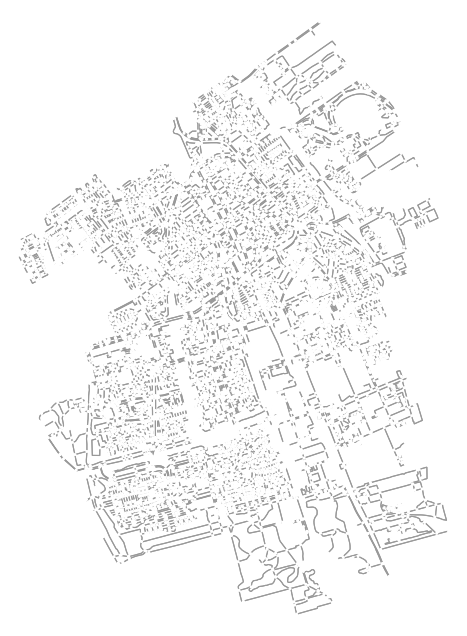

In [12]:
import osmnx as ox
import matplotlib.pyplot as plt

# Define a smaller bounding box (north, south, east, west) for a specific area in Delft
north = 52.0125  # Northernmost latitude (adjust as needed)
south = 52.0110  # Southernmost latitude (adjust as needed)
east = 4.3610    # Easternmost longitude (adjust as needed)
west = 4.3540    # Westernmost longitude (adjust as needed)

# Download the pedestrian network within the smaller bounding box
# G = ox.graph_from_bbox((north, south, east, west), network_type='walk')
place_name = "Delft, Netherlands"
G = ox.graph_from_place(place_name, network_type='walk')
# Plot the pedestrian network
fig, ax = ox.plot_graph(G, node_size=5, edge_linewidth=0.8, bgcolor="white")
plt.show()

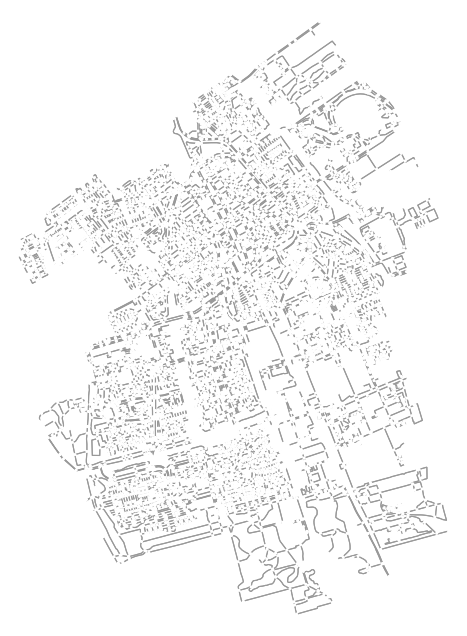

In [18]:
# Plot the pedestrian network
fig, ax = ox.plot_graph(G, node_size=5, edge_linewidth=0.8, bgcolor="white")

# Save the plot if needed
# plt.savefig("pedestrian_network.png", dpi=300)
plt.show()

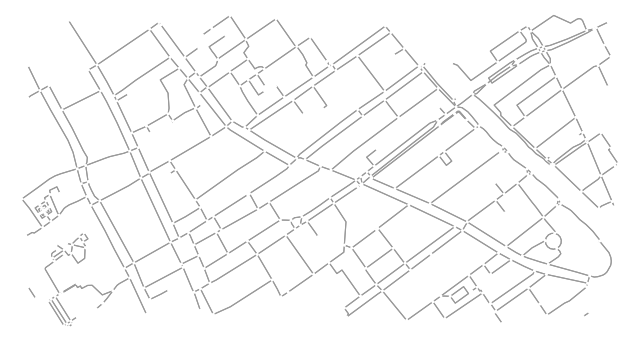

In [40]:
import osmnx as ox
import matplotlib.pyplot as plt

# Step 1: Download the full pedestrian network for Delft
place_name = "Delft, Netherlands"
G_full = ox.graph_from_place(place_name, network_type='walk')

# Step 2: Define the bounding box for the smaller area (example coordinates)
north, west, south, east =  52.015138004863104, 4.3534506404986075, 52.0102238436082, 4.368840442155412  # Adjust these values as needed

# Step 3: Filter the network based on the bounding box
# Get nodes within the bounding box
nodes = ox.graph_to_gdfs(G_full, nodes=True, edges=False)
filtered_nodes = nodes[(nodes['y'] <= north) & (nodes['y'] >= south) &
                        (nodes['x'] <= east) & (nodes['x'] >= west)]

# Get the edges that connect the filtered nodes
edges = ox.graph_to_gdfs(G_full, nodes=False, edges=True)
# add u and v nodes to the keys
# Extract the 'u' (source) and 'v' (target) columns from the MultiIndex
edges['u'] = edges.index.get_level_values(0)  # First level of the index
edges['v'] = edges.index.get_level_values(1)  # Second level of the index
filtered_edges = edges[edges['u'].isin(filtered_nodes.index) & edges['v'].isin(filtered_nodes.index)]


# Create a new graph from the filtered nodes and edges
G_filtered = ox.graph_from_gdfs(filtered_nodes, filtered_edges)

# Step 4: Plot the filtered pedestrian network
fig, ax = ox.plot_graph(G_filtered, node_size=5, edge_linewidth=0.8, bgcolor="white")
# plt.title("Filtered Pedestrian Network in Delft")
# plt.show()

In [41]:
import osmnx as ox
import folium
# Convert graph to a GeoDataFrame
nodes, edges = ox.graph_to_gdfs(G_filtered)

# Create a folium map
m = folium.Map(location=[52.00667, 4.35556], zoom_start=12)  # Melbourne's coordinates

# Add edges to the map
for _, row in edges.iterrows():
    coords = [(y, x) for x, y in row["geometry"].coords]
    folium.PolyLine(coords, color="blue", weight=2).add_to(m)

# Display the map
# m.save("pedestrian_network.html")
m
